## Task1: Developing a Machine Learning Model

### Importing Dataset

In [151]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

ball_stats = pd.read_excel(r'/Users/liammah/Desktop/ENDG_deliverable_3_NBA.xlsx')
ball_statsX = ball_stats.drop(columns = ['POS','PLAYER','TEAM','Unnamed: 0'])
ball_statsY = ball_stats.POS

#### Note: You must first change the excel  (.xlsx) data to the correct directory before running.

### Divide Data into Training and Test Set

In [152]:
from sklearn.model_selection import train_test_split
ball_statsX_train, ball_statsX_test, ball_statsY_train, ball_statsY_test = train_test_split(ball_statsX, ball_statsY)

### Data Processing

In [153]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [156]:
le = le.fit(ball_statsY_train)
y_train = le.transform(ball_statsY_train)

In [157]:
nl = preprocessing.MinMaxScaler()
nl = nl.fit(ball_statsX_train.to_numpy())
x_train = nl.transform(ball_statsX_train.to_numpy())

### Build Machine Learning Model

In [158]:
from sklearn.neighbors import KNeighborsClassifier

y_test = le.transform(ball_statsY_test.to_numpy())
x_test = nl.transform(ball_statsX_test.to_numpy())

## Task 2: Analysis Work for k

### Task 2(a): Model Accuracy

In [175]:
data_knn = DataFrame()
data_knn['test_scores'] = []
data_knn['train_scores'] = []
data_knn['knn_values'] = []

In [160]:
counter = 1
counter_2 = 0
while counter < 10:
    knn = KNeighborsClassifier(n_neighbors = counter)
    knn = knn.fit(x_train,y_train)
    data_knn.loc[counter_2, 'test_scores'] = knn.score(x_test, y_test)
    data_knn.loc[counter_2, 'train_scores'] = knn.score(x_train, y_train)
    data_knn.loc[counter_2, 'knn_values'] = counter

    counter = counter + 1
    counter_2 = counter_2 + 1

In [161]:
data_knn

,test_scores,train_scores,knn_values
0,0.538462,0.868421,1.0
1,0.615385,0.763158,2.0
2,0.730769,0.736842,3.0
3,0.653846,0.736842,4.0
4,0.769231,0.736842,5.0
5,0.730769,0.776316,6.0
6,0.730769,0.750000,7.0
7,0.692308,0.750000,8.0
8,0.730769,0.736842,9.0


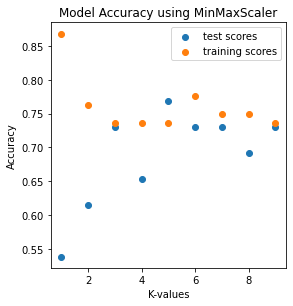

In [162]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (4, 4))
plt.tight_layout()

axs.scatter(data_knn.iloc[:,2],data_knn.iloc[:,0], label='test scores')
axs.scatter(data_knn.iloc[:,2],data_knn.iloc[:,1], label='training scores')
axs.legend()

plt.title('Model Accuracy using MinMaxScaler')
plt.ylabel('Accuracy')
plt.xlabel('K-values')
plt.show()

### Task 2(b): StandardScaler() Accuracy

In [166]:
stand = preprocessing.StandardScaler()
stand = stand.fit(ball_statsX_train.to_numpy())
x_train_2 = stand.transform(ball_statsX_train.to_numpy())

In [167]:
y_test = le.transform(ball_statsY_test.to_numpy())
x_test_2 = stand.transform(ball_statsX_test.to_numpy())

In [168]:
data_knn2 = DataFrame()
data_knn2['test_scores'] = []
data_knn2['train_scores'] = []
data_knn2['knn_values'] = []

In [169]:
counter = 1
counter_2 = 0
while counter < 10:
    knn2 = KNeighborsClassifier(n_neighbors = counter)
    knn2 = knn2.fit(x_train_2,y_train)

    data_knn2.loc[counter_2, 'test_scores'] = knn2.score(x_test_2, y_test)
    data_knn2.loc[counter_2, 'train_scores'] = knn2.score(x_train_2, y_train)
    data_knn2.loc[counter_2, 'knn_values'] = counter

    counter = counter + 1
    counter_2 = counter_2 + 1

In [170]:
data_knn2

,test_scores,train_scores,knn_values
0,0.538462,0.868421,1.0
1,0.615385,0.750000,2.0
2,0.730769,0.736842,3.0
3,0.653846,0.736842,4.0
4,0.769231,0.736842,5.0
5,0.730769,0.763158,6.0
6,0.769231,0.736842,7.0
7,0.730769,0.750000,8.0
8,0.730769,0.736842,9.0


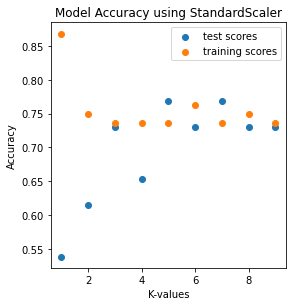

In [171]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (4, 4))
plt.tight_layout()

axs.scatter(data_knn2.iloc[:,2],data_knn2.iloc[:,0], label='test scores')
axs.scatter(data_knn2.iloc[:,2],data_knn2.iloc[:,1], label='training scores')
axs.legend()

plt.title('Model Accuracy using StandardScaler')
plt.ylabel('Accuracy')
plt.xlabel('K-values')
plt.show()

## Task #3 


### Task 3(a): Finding the Best Scaler and Value for k

The K value was selected to be 2, this was because it had the highest sum of accurately predicted instances between the training set and test set for both scalers. Both the StandardScaler and MinMaxScaler performed similarly as their accuracy when predicting the class of the test set and training set were extremely close or equal for all values of kneighbours. For the value k = 2 in particular, the MinMaxScaler and StandardScaler provided the exact same results. Ultimately, the MinMaxScaler was chosen arbitrarily. 

In [143]:
    knn3 = KNeighborsClassifier(n_neighbors = 2)
    knn3 = knn3.fit(x_train_2,y_train)
    print(knn3.predict(x_test_2))
    print(y_test)

[1 0 1 0 1 1 0 0 1 1 1 0 1 2 1 1 0 1 0 2 2 1 0 1 0 0]
[1 1 0 1 0 0 0 0 1 1 2 0 1 2 2 1 0 1 0 1 2 2 0 2 1 1]


### Task 3(b): Confusion Matrix

In [144]:
 from sklearn.metrics import confusion_matrix

In [150]:
confusion_matrix(y_test, knn3.predict(x_test_2))

array([[6, 3, 0],
       [4, 6, 1],
       [0, 4, 2]])

The confusion matrix is a matrix that calculates the number of true negatives, false negatives, true positives, and false negatives. For the matrix C, the value Cij represents the number of instances that are in group i and are predicted in group j. For example the number of true positives in group 0 would be the value C00, in this case it is 9. Ideally, we want the most number of occurrences in cells where i = j. This indicates that the trained model was correct in the classification process. Note that the final row shows that our model is inaccurate when detecting the third class (6 wrong instances, 2 right instances).

### Task 4: Applying the Model

In [174]:
new_player = np.array([[19.0, 54.2, 6.3, 7.3, 1.1, 0.9]])
X_new = nl.transform(new_player)
knn.predict(X_new)

array([1])

#### Note that by using the MinMaxScaler (as chosen in task 3A), the machine learning model was able to correctly classify the new instance with '1' (Michael Porter Jr. as a forward).